# Graia MNIST digits example

In [1]:
# %pip install numpy
# %pip install matplotlib
import numpy as np
import matplotlib.pyplot as plt

# to get the MNIST digits
# %pip install tensorflow
import tensorflow as tf
import tensorflow.keras

2024-04-04 13:32:00.728681: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-04 13:32:00.732187: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-04 13:32:00.764091: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-04 13:32:01.465719: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
# Graia
# %pip install pyopencl
# %pip install pocl-binary-distribution
# %pip install futhark-ffi
from graia import Graia

🌄 Graia v0.0.1


In [3]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# print(train_labels[0])
# plt.imshow(train_images[0])

In [4]:
N = 1
train_images = train_images[:N]
train_labels = train_labels[:N]
train_images = train_images.reshape(N, 28*28)

In [5]:
model = Graia(inputs=28*28, layer_nodes=16, layers=2, outputs=10, seed=37)
# plt.imshow(model.hidden_weights[0])
# print(model.hidden_weights[0])

🌄 Graia model with 12,960 parameters ready.


In [6]:
model.fit(train_images, train_labels, epochs=1)


Epoch 1/1: accuracy 100.000%


In [7]:
print("\n", model.input_weights[:2], "...")
print("\n", model.hidden_weights[0])
print("\n", model.output_weights[:2], "...")



 [[-1  1  1 ... -1  1 -1]
 [ 0 -1 -1 ...  0 -1  1]] ...

 [[ 8  7  8  3  5  5 -3 -8  3  6 -7 -8 -4 -6 -5  4]
 [ 1 -1  1  1  0 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1]
 [ 5 -4 -5 -7  8 -5 -2  2  7 -2 -4  4 -4 -7  4  4]
 [-5 -7  7  5 -6 -4  6 -7 -7  2 -8 -8  4 -7  7  7]
 [ 2 -4 -5  3  6 -3 -5  7  2  2  3  8  7 -5 -3  2]
 [-1  1  1 -1 -1  0  1 -1  1  1 -1 -1 -1 -1 -1 -1]
 [-3  4 -6  3 -7  7  7  6  2  5 -5  4  5  7  4 -7]
 [-4  6 -2  2 -7  7  7 -7 -7  8  2 -6  7  8 -3 -7]
 [-5  7  7 -3 -8 -3  3  7  2 -7 -3 -5  7 -7 -8  3]
 [-1 -1 -1  1  1 -1  1 -1  1  1  0  0  1 -1 -1  1]
 [ 0 -1  1 -1 -1 -1  1  1 -1 -1 -1 -1  1 -1  1  1]
 [-1  1  1 -1  1 -1  0  0 -1 -1 -1 -1 -1 -1 -1 -1]
 [-2  2 -2 -6  8 -7  3  7  2 -3 -5  7 -5 -3 -7  2]
 [ 1 -1  0 -1  1 -1 -1 -1 -1  0  1  0 -1  1  1 -1]
 [-4 -8  5  2 -7  3  4  7  7 -7  5  2 -4 -2  2 -8]
 [-6  6 -8 -7  7  5 -7  4  7  5 -2  2 -7 -8 -6 -4]]

 [[ 1  1 -1  1  0  1  1 -1  1  1 -1  1  1  1  1 -1]
 [ 1  1 -1 -1 -1  0  1 -1 -1 -1 -1  1  1 -1 -1  0]] ...



 [ 0  0  0  9 19  0  0 12  8  5  7  7  0  1  7  0]


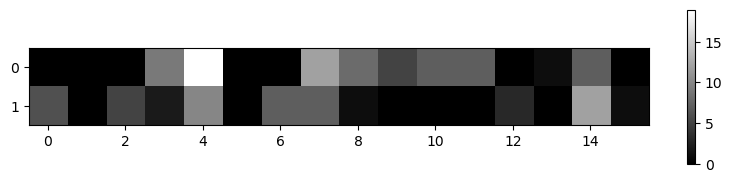


 [0 0 0 0 1 8 0 0 0 3]


In [9]:
plt.figure(figsize = (10,2))
plt.imshow(model.last_intermediate_outputs, cmap="grey")
plt.colorbar()
print("\n", model.last_intermediate_outputs[0])
plt.show()
print("\n", model.last_outputs)